In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# TRAIN 

In [2]:
X = [(0,0),(0,1),(1,0),(1,1)]
y = [ t[0] ^ t[1] for t in X]

In [3]:
X = np.array(X).reshape(4,2)
y = np.array(y)

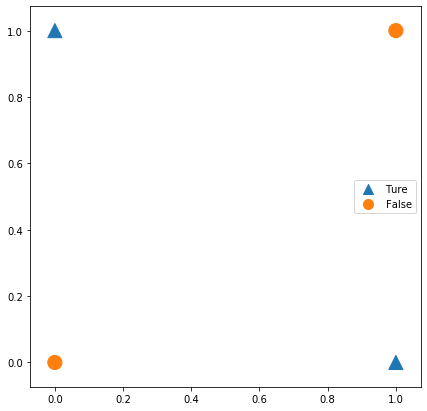

In [4]:
px = X[:,0]
py = X[:,1]
area1 = np.ma.masked_where(y < 0.5, y)
area2 = np.ma.masked_where(y >= 0.5, y+1)
plt.figure(figsize=(7,7))
plt.scatter(px, py, s=area1*200, marker='^', label='Ture')
plt.scatter(px, py, s=area2*200, marker='o', label='False')
plt.legend()

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, 
                          activation='relu', 
                          input_shape = (2,)),
        tf.keras.layers.Dense(1, 
                          activation='linear')
    ])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

In [7]:
model.fit(X,y, epochs=100000, verbose=0)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(2, 20) dtype=float32, numpy=
 array([[-0.47791907, -0.50169504,  0.13897105, -0.5945212 , -0.07489628,
          0.46080348,  0.5706945 , -0.2968496 ,  0.02543671,  0.76958823,
          0.15980595,  0.20774963, -0.22685245, -0.3121693 , -0.5285877 ,
          0.39228597,  0.07927534, -0.48955396,  0.33995885, -0.29334217],
        [-0.03341725, -0.10610932, -0.2793702 ,  0.5945211 , -0.12924802,
         -0.2043673 , -0.5649719 , -0.1203047 , -0.03181455, -0.20080072,
          0.20362444, -0.04123248, -0.07836276, -0.20820233,  0.52858776,
         -0.4652037 , -0.33896214,  0.48955396,  0.5010776 ,  0.27982476]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(20,) dtype=float32, numpy=
 array([ 0.0000000e+00,  0.0000000e+00, -1.4644623e-01, -3.1915462e-07,
         0.0000000e+00,  2.3955924e-09,  1.2652112e-08,  0.0000000e+00,
        -4.4519119e-02,  4.6393143e-09,  4.9466979e-02,  2.4529740e-09,
         0.0000000e+00,  0.0000000e

In [10]:
model(X)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [11]:
pred = np.argmax(model(X), axis=1)
print(y)
print(pred)
print(y==pred)

[0 1 1 0]
[0 0 0 0]
[ True False False  True]


# TEST

In [12]:
s_x1 = [x/100 for x in range(100)]
s_x2 = [x/100 for x in range(100)]

In [13]:
s_X = [(i,j) for i,j in product(s_x1,s_x2)]
s_X = np.array(s_X).reshape(len(s_X),2)

In [14]:
pred = model(s_X)

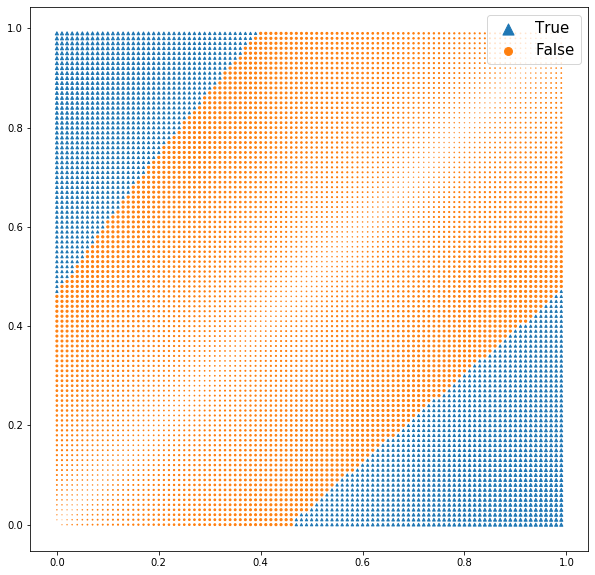

In [15]:
sx1 = s_X[:,0]
sx2 = s_X[:,1]
area1 = np.ma.masked_where(pred < 0.5, pred)
area2 = np.ma.masked_where(pred >= 0.5, pred)
plt.figure(figsize=(10,10))
plt.scatter(sx1, sx2, s=area1*10, marker='^', label='True')
plt.scatter(sx1, sx2, s=area2*10, marker='o',label='False')
plt.legend(fontsize=15,markerscale=5)

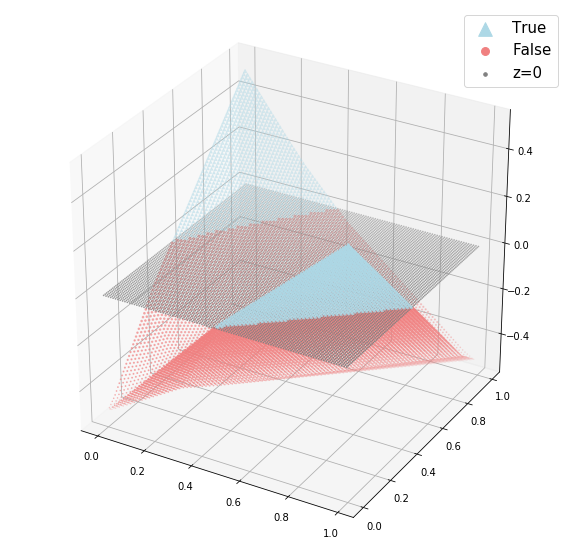

In [16]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

area1 = np.ma.masked_where(pred < 0.5, pred)
area2 = np.ma.masked_where(pred >= 0.5, pred)

ax.scatter(sx1, sx2, pred-0.5, s=area1*10, c='lightblue', marker='^', label='True')
ax.scatter(sx1, sx2, pred-0.5, s=area2*10, c='lightcoral', marker='o',label='False')
ax.scatter(sx1, sx2, [0]*10000, s=0.5, c='gray', label='z=0')
ax.legend(fontsize=15,markerscale=5)

# Let's 구현하자! Perceptron 

In [ ]:
import numpy as np

class Perceptron(object):

    def __init__(self, input_shape, threshold=100, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = np.zeros(input_shape)
        self.bias = np.zeros(1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [ ]:
import numpy as np

training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
print(perceptron.predict(inputs))
#=> 1

inputs = np.array([0, 1])
print(perceptron.predict(inputs)) 
#=> 0

In [64]:
def relu(x, w):
    return max(0,x*w)

In [80]:
def function1(x, w1, w2, w3, w4):
    return relu(x, w1)*w3 + relu(x, w2)*w4

In [81]:
from itertools import product

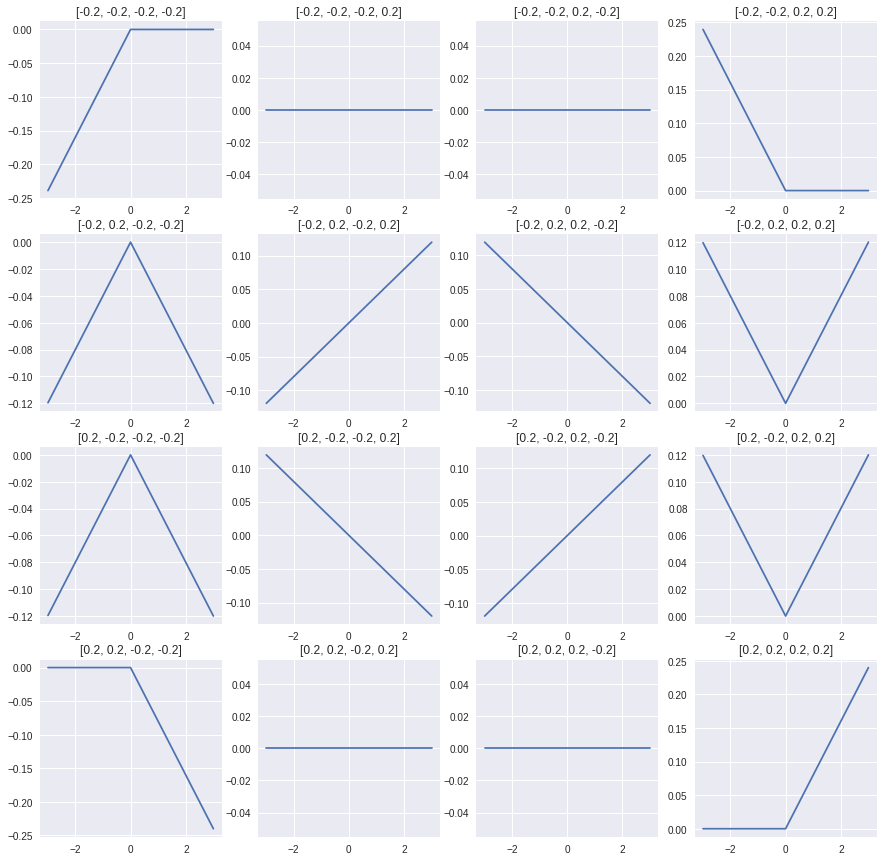

In [82]:
X = [-3 + i/100 for i in range(1,601)]
i1, i2, i3, i4 = [-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2]

plt.figure(figsize=(15,15), facecolor='w')
plt.style.use('seaborn')

for i, (w1, w2, w3, w4) in enumerate(product(i1,i2,i3,i4)):
    y = [function1(t, w1,w2,w3,w4) for t in X]
    plt.subplot(4,4, i+1)
    plt.plot(X,y)
    plt.title(str(list((w1, w2, w3, w4))))

plt.show()

In [97]:
def function2(x, w0, w1, w2, w3, w4, w5, w6, w7):
    return relu(x, w1+w0)*w4 + relu(x, w2+w0)*w5 + relu(x, w3+w0)*w6 + w7

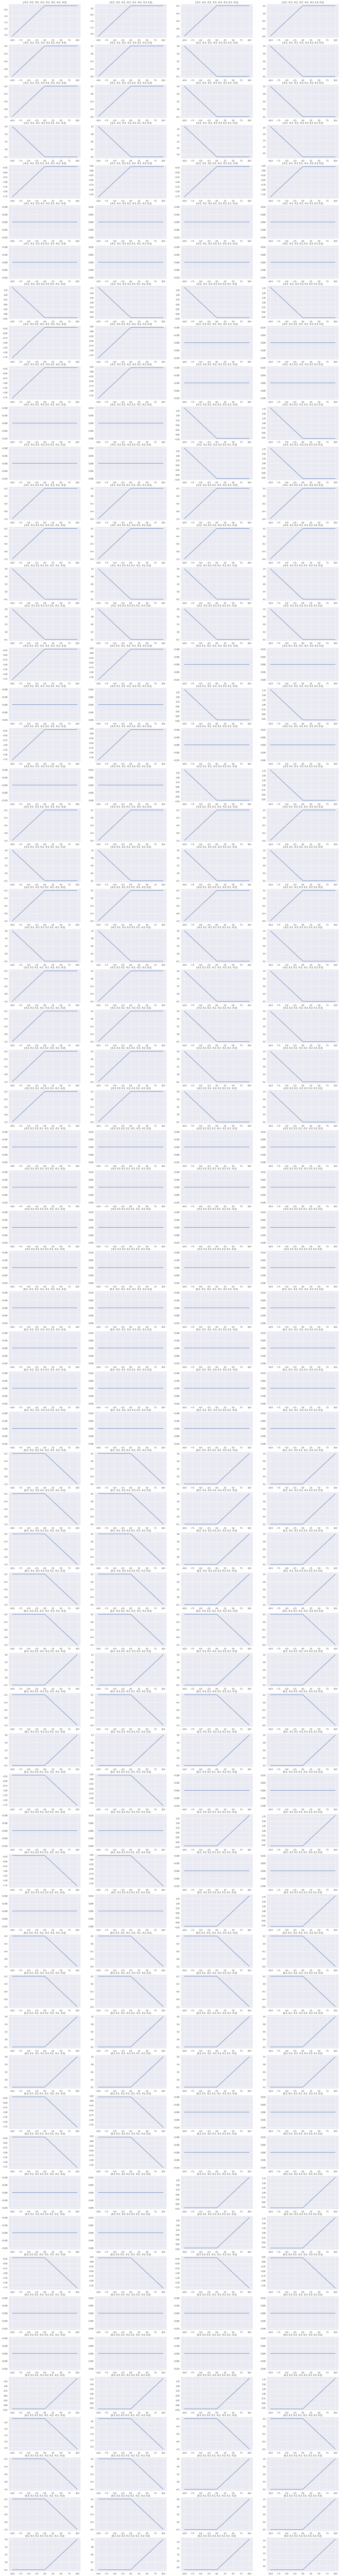

In [101]:
j0, j1, j2, j3, j4, j5, j6, j7 = [-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2]

plt.figure(figsize=(30,240), facecolor='w')
plt.style.use('seaborn')

X = [-10 + i/100 for i in range(1,2001)]

for i, W in enumerate(product(j0, j1, j2, j3, j4, j5, j6, j7)):
    y = [function2(t, *W) for t in X]
    plt.subplot(64,4, i+1)
    plt.plot(X,y)
    plt.title(str((W)))

plt.show()

In [102]:
def function3(x, w1, w2, w3, w4, w5, w6):
    return relu(relu(x, w1 + w2) * w3 + w4, w5) + w6

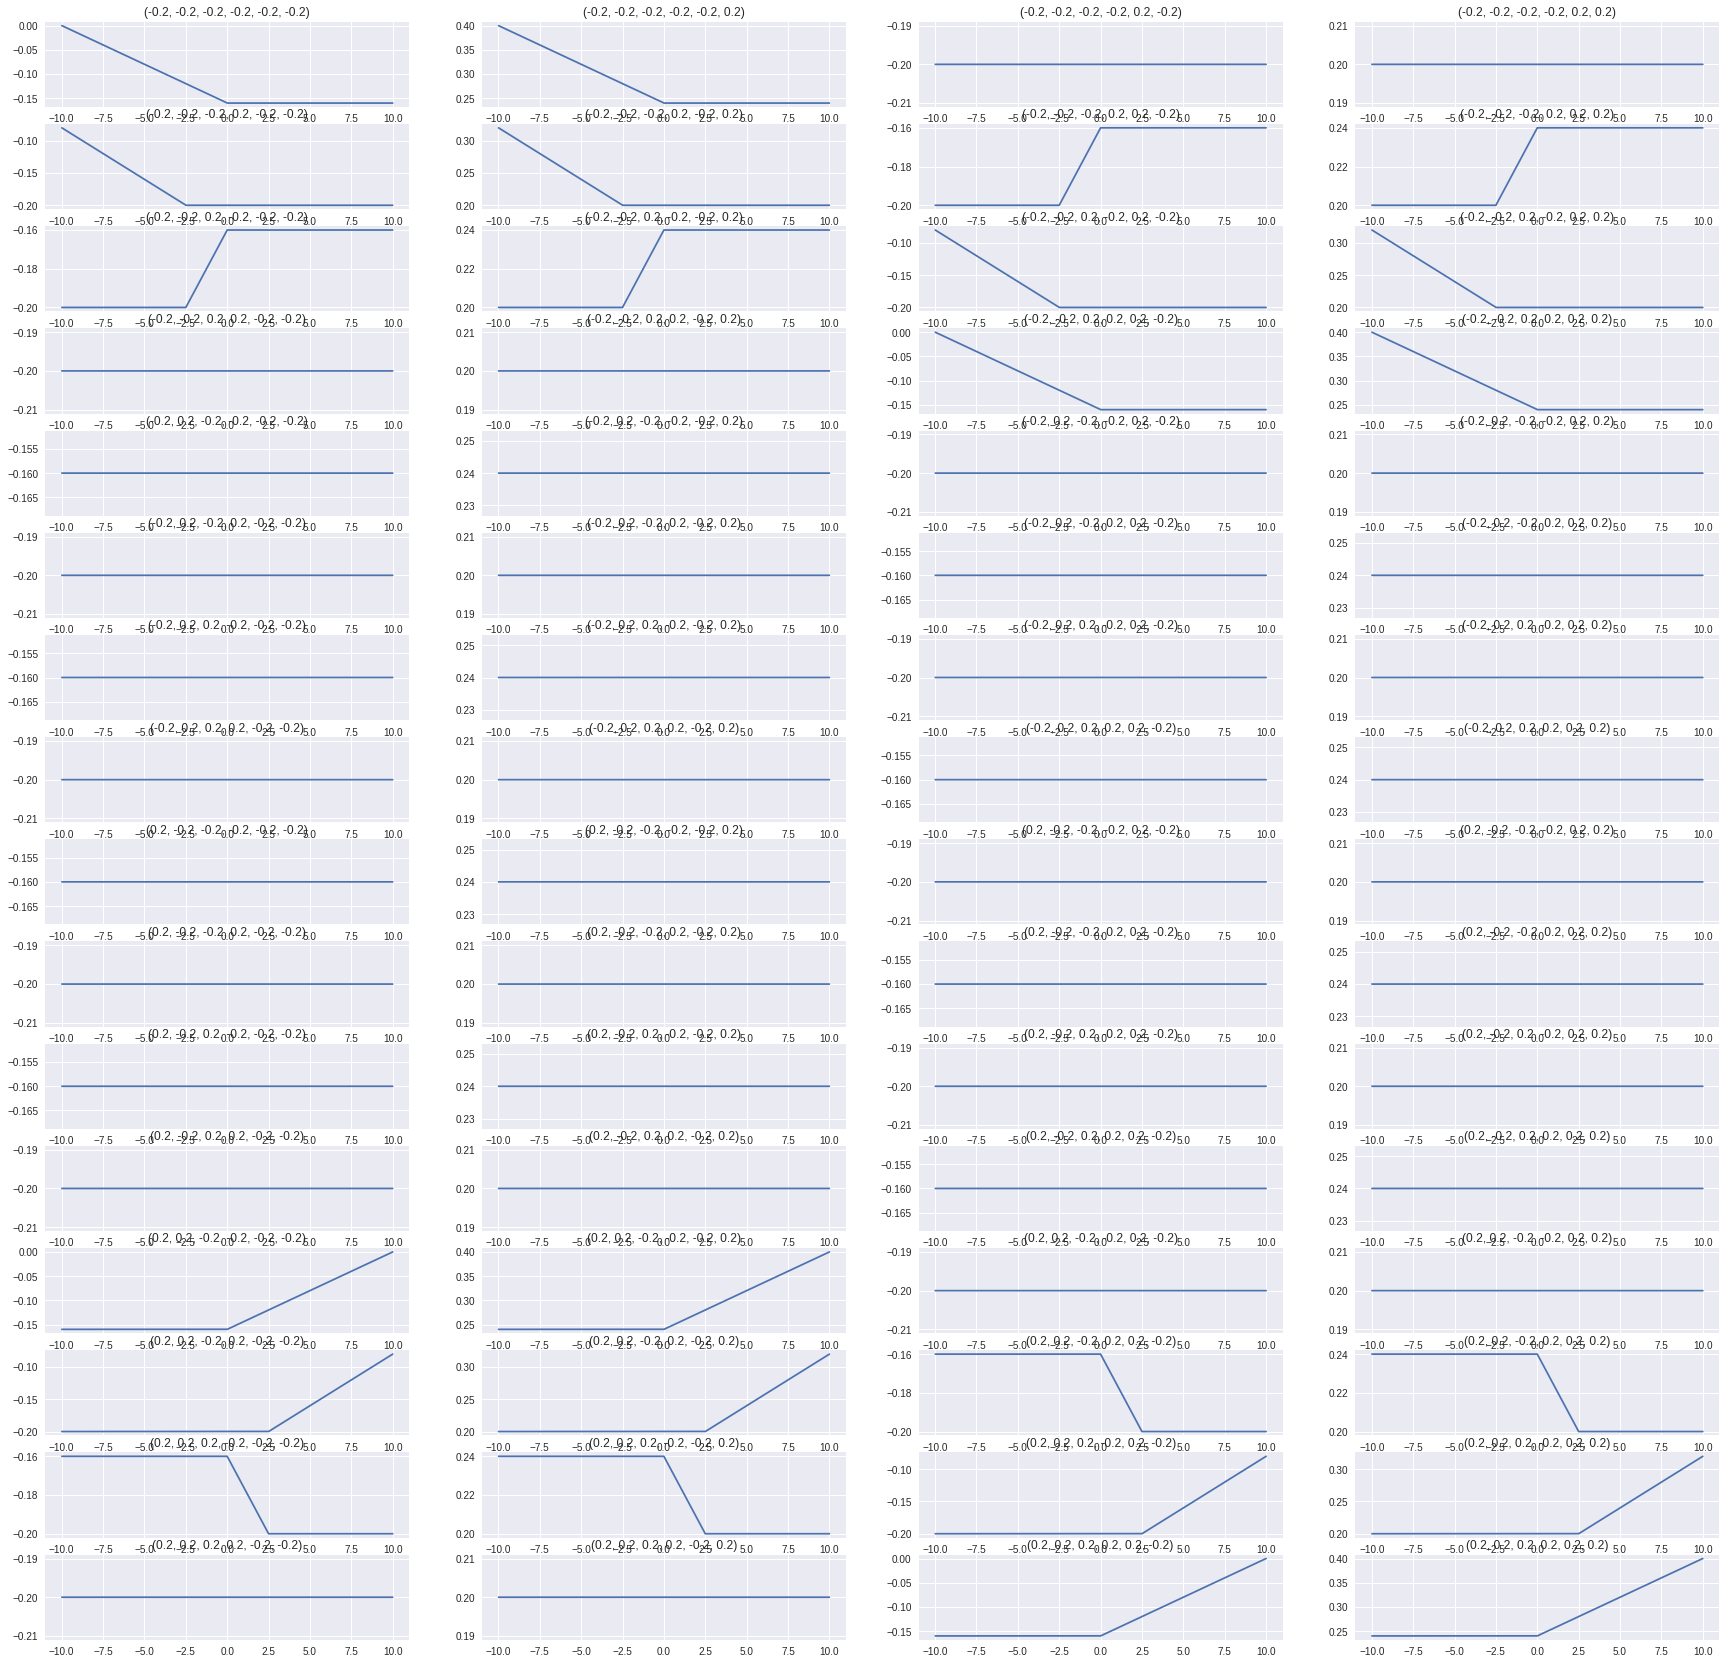

In [104]:
k1, k2, k3, k4, k5, k6= [-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2],[-0.2, 0.2]

plt.figure(figsize=(30,120), facecolor='w')
plt.style.use('seaborn')

X = [-10 + i/100 for i in range(1,2001)]

for i, W in enumerate(product(k1, k2, k3, k4, k5, k6)):
    y = [function3(t, *W) for t in X]
    plt.subplot(64,4, i+1)
    plt.plot(X,y)
    plt.title(str((W)))

plt.show()